## PAIR PROGRAMMING LIMPIEZA III

### Valores extremos / Outliers
---

Antes de seguir, recordamos las preguntas que nos planteamos al principio del pair programming de EDA para dirigir nuestro análisis.

- ¿Es Australia es el sitio más peligroso y letal para estar relajada en la playa?
- ¿Cuál es el rango de edad que sufre la mayoría de los ataques?
- Independientemente de la edad, sufren los hombres más ataques que las mujeres?
- ¿En qué mes ocurren más ataques?
- ¿Cuál es la relación entre la especie y el tipo de ataque (si es fatal o no)?
- ¿Cómo han evolucionado los ataques a lo largo del tiempo?

Actualizamos esta tabla ya que en el ejercicio de pair de Limpieza I y II ya dejamos algunas columnas limpitas:


- age ✔️ la limpiamos en el pair de Limpieza II
- species ✔️ la limpiamos en el pair de Limpieza II
- country ✔️ la limpiamos en el pair de Limpieza II
- fatal ✔️ la limpiamos en el pair de Pandas V
- year ✔️ es una columna de tipo float deberíamos convertirla a integer
- sex ✔️ la limpiamos en el pair de Pandas V
- fecha ✔️ la limpiamos en el pair de Pandas V

Ya hemos limpiado todas las columnas que parecía que no tenían el tipo de dato que queríamos o que tenían demasiada información. Por lo tanto, en este ejercicio tendremos que limpiar los outliers.

---

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

pd.options.display.max_columns = None

In [2]:
df= pd.read_pickle("../files/attacks9.pickle")
df.head(2)

,case_number,year,type,country,activity,age,species_,date,mes_ataque,fatal,sexo,cat_species,edades
0,1800.00.00,1800,Unprovoked,seychelles,a corsair's boat was overturned,NaN,NaN,1800,NaN,Y,F,NaN,NaN
1,1797.05.28.R,1797,Unprovoked,NaN,Dropped overboard,NaN,NaN,Reported May-28-1797,May,Y,NaN,NaN,NaN


---

**EJERCICIO 1**

¿Sobre qué columnas podremos eliminar o reemplazar los outliers?

In [3]:
df_numericas= df.select_dtypes(include = np.number)
df_numericas

,year,edades
0,1800,NaN
1,1797,NaN
2,1792,NaN
3,1791,NaN
4,1788,NaN
...,...,...
1667,1901,29.0
1668,1894,19.0
1669,1892,21.0
1670,1880,12.0


In [4]:
df.year.value_counts()

0       125
2015     68
2007     57
2012     54
2002     53
       ... 
1721      1
1723      1
1733      1
1738      1
1868      1
Name: year, Length: 147, dtype: int64

In [5]:
lista_columnas = list(df_numericas.columns)
lista_columnas

['year', 'edades']

In [6]:
def detectar_outliers(lista_columnas, dataframe): 
    
    dicc_indices = {}

    for col in lista_columnas:
        
        Q1 = np.nanpercentile(df[col], 25)
        Q3 = np.nanpercentile(df[col], 75)
        
        IQR = Q3 - Q1
        
        outlier_step = 1.5 * IQR
        
        outliers_data = dataframe[(dataframe[col] < Q1 - outlier_step) | (dataframe[col] > Q3 + outlier_step)]
        print(col)
        display(outliers_data) 
        
        if outliers_data.shape[0] > 0: 
        
            dicc_indices[col] = (list(outliers_data.index))


    return dicc_indices 

In [7]:
indices = detectar_outliers(lista_columnas, df)


year


,case_number,year,type,country,activity,age,species_,date,mes_ataque,fatal,sexo,cat_species,edades
0,1800.00.00,1800,Unprovoked,seychelles,a corsair's boat was overturned,NaN,NaN,1800,NaN,Y,F,NaN,NaN
1,1797.05.28.R,1797,Unprovoked,NaN,Dropped overboard,NaN,NaN,Reported May-28-1797,May,Y,NaN,NaN,NaN
2,1792.09.12,1792,Provoked,england,Fishing,NaN,NaN,12-Sep-1792,Sep,Y,M,NaN,NaN
3,1791.00.00,1791,Unprovoked,australia,NaN,NaN,NaN,1791,NaN,Y,F,NaN,NaN
4,1788.05.10,1788,Boat,australia,Fishing,NaN,NaN,10-May-1788,May,N,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,ND.0001,0,Unprovoked,ceylon (sri lanka),Swimming,15,NaN,1845-1853,845,Y,M,NaN,15.0
1668,1894.11.28,1894,Unprovoked,australia,Bathing,19,10' to 12' shark,28-Nov-1894,Nov,N,M,Unspecified,19.0
1669,1892.03.02,1892,Provoked,australia,Fishing,21,12' shark,02-Mar-1892,Mar,N,M,Unspecified,21.0
1670,1880.11.25,1880,Unprovoked,australia,Swimming,12,Bull shark,25-Nov-1880,Nov,Y,M,Bull,12.0


edades


,case_number,year,type,country,activity,age,species_,date,mes_ataque,fatal,sexo,cat_species,edades
182,2018.03.09.b,2018,Unprovoked,australia,Swimming,69,3.5 m shark,9-Mar-2018,Mar,N,M,Unspecified,69.0
200,2017.08.23,2017,Unprovoked,usa,SUP,69,"White shark, 5' to 7'",23-Aug-2017,Aug,N,M,White,69.0
221,2016.11.28,2016,Provoked,australia,Fishing,73,"Broadnose sevengill shark, 1.5 m",28-Nov-2016,Nov,N,M,Unspecified,73.0
250,2016.04.09,2016,Unprovoked,new caledonia,Walking,69,"Tiger shark, 2.5 m",09-Apr-2016,Apr,Y,F,Tiger,69.0
254,2015.12.22,2015,Unprovoked,usa,Paddle boarding,71,9' shark,22-Dec-2015,Dec,N,M,Unspecified,71.0
291,2015.07.01,2015,Unprovoked,usa,Swimming,68,6' to 7' shark,01-Jul-2015,Jul,N,M,Unspecified,68.0
309,2015.04.24.c,2015,Unprovoked,australia,Surf skiing,71,"White shark, 3 m",24-Jun-2015,Jun,N,M,White,71.0
311,2015.04.03,2015,Unprovoked,usa,Spearfishing,70,Bull shark,03-Apr-2015,Apr,N,M,Bull,70.0
354,2014.03.22.b,2014,Unprovoked,south africa,Swimming,66,2 m shark,22-Mar-2014,Mar,Y,M,Unspecified,66.0
372,2013.10.11,2013,Unprovoked,south africa,Swimming / snorkeling,74,White shark,11-Oct-2013,Oct,Y,M,White,74.0


    - Las filas sobre las que podemos reemplazar o eliminar los outliers son en dos columnas de tipo numéricas(year. age), 
    - En el caso de year (que tiene 174 outliers) para responder a la última pregunta no deberíamos eliminar los outliers, pero para otras preguntas si que podríamos separar en otro df los outliers ya que nos influirían en otros análisis. 
    - En el caso de age (que tiene 26 outliers) tampoco consideramos eliminarlos para poder tener datos que engloben todas las edades, ya que los outliers son de las personas con mayor edad.

---

**EJERCICIO 2**

Identifica visualmente los outliers

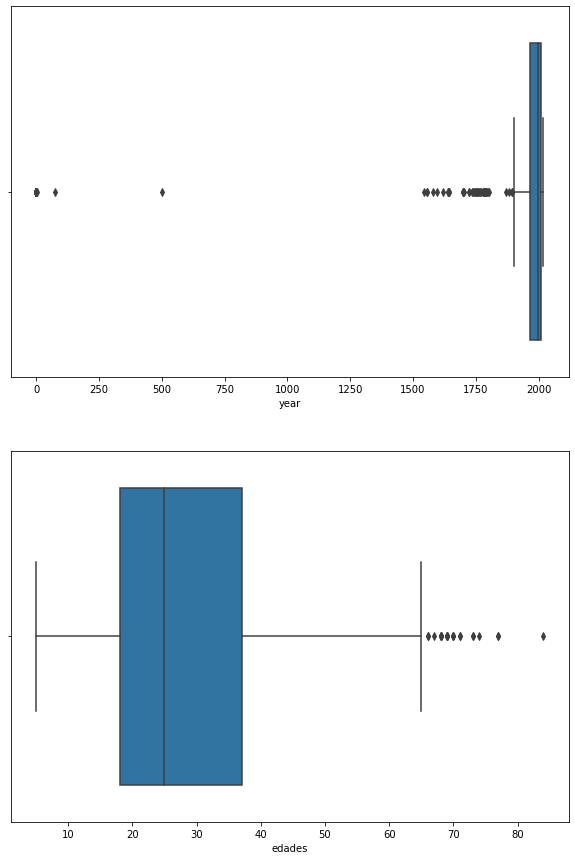

In [8]:
fig, ax = plt.subplots(2, 1, figsize=(10,15))

for i, column in enumerate(df_numericas.columns):
    sns.boxplot(x=df_numericas.columns[i], data=df_numericas, ax=ax[i])
plt.show()

In [9]:
print(f'La media de los años es {df.year.mean()}')
print(f'-----------------------------------------')
print(f'La mediana de los años es {df.year.median()}')
print(f'-----------------------------------------')
print(f'El máximo de los años es {df.year.max()}')
print(f'-----------------------------------------')
print(f'El mínimo de los años es {df.year.min()}')

La media de los años es 1832.6883971291866
-----------------------------------------
La mediana de los años es 1997.0
-----------------------------------------
El máximo de los años es 2018
-----------------------------------------
El mínimo de los años es 0


In [10]:
print(f'La media de las edades es {df.edades.mean()}')
print(f'-----------------------------------------')
print(f'La mediana de las edades es {df.edades.median()}')
print(f'-----------------------------------------')
print(f'El máximo de las edades es {df.edades.max()}')
print(f'-----------------------------------------')
print(f'El mínimo de las edades es {df.edades.min()}')

La media de las edades es 28.660927152317882
-----------------------------------------
La mediana de las edades es 25.0
-----------------------------------------
El máximo de las edades es 84.0
-----------------------------------------
El mínimo de las edades es 5.0


---

**EJERCICIO 3**

Identifica sobre el dataframe las filas que son outliers

In [14]:
# Llamamos a la variable arriba creada que nos devuelve el diccionario donde las keys son los nombres de las columnas y los values los índices de las filas dónde están los outliers.

indices

{'year': [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  1

---

**EJERCICIO 4**
Reemplaza los outliers por el estadístico más correcto.

In [15]:
for k, v in indices.items():
    mediana = df[k].median()
    for i in v:
        df.loc[i,k] = mediana


In [18]:
# Verificamos con los índices en las dos columnas que teníamos outliers, que se han cambiado por la mediana
print(df['edades'].iloc[200,])
print(df['year'].iloc[113,])

25.0
1997


---

**EJERCICIO 5**

Guarda el csv con las columnas limpias para seguir trabajando con este dataframe limpio en el siguiente pair programming de limpieza.

In [19]:
df.to_pickle('../files/attacks10.pickle')

> PENDIENTE: columna de mes_ataque reformarla como hicimos en EDA III para obtener mejor los meses de la columna date. Una vez realizado guardar el archivo para tenerlo actualizado.